# Multiple Linear Regression

## BoomBikes Case Study

### Problem Statement:

BoomBikes, a US bike-sharing provider, is struggling with revenue declines due to the Covid-19 pandemic. To prepare for an eventual recovery and increase profitability, the company aims to understand bike-sharing demand patterns in the American market.

BoomBikes has contracted a consulting firm to analyze factors influencing bike-sharing demand. They seek to identify:

- Significant variables affecting demand.
- How well these variables predict bike-sharing demand.

### Business Goal: 
Develop a predictive model to:

- Determine which factors are most significant in influencing bike demand.
- Evaluate how well these factors explain demand variations. This model will help BoomBikes adjust their business strategy to   better meet customer needs and understand market dynamics, especially in new regions.

## Step 1 Understanding the Data

lets start by importing the necessary libraries and the dataset.

In [169]:
# suppress warnings
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [170]:
# Read the boomBike dataset
bike = pd.read_csv('day.csv')
bike.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [171]:
# Check the shape of the dataset
bike.shape

(730, 16)

In [172]:
# change dteday to single day format as we have year and month as separate columns
bike['dteday'] = pd.to_datetime(bike['dteday'].astype(str), format='%d-%m-%Y').dt.day
bike.head()


instant  dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1       1       1   0     1        0        6           0   
1        2       2       1   0     1        0        0           0   
2        3       3       1   0     1        0        1           1   
3        4       4       1   0     1        0        2           1   
4        5       5       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [173]:
# Check the info of the dataset
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    int32  
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int32(1), int64(11)
memory usage: 88.5 KB


In [174]:
# Check if there are any missing values in the dataset
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [175]:
# Descriptive statistics of the dataset
bike.describe()

instant      dteday      season          yr        mnth     holiday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000   15.720548    2.498630    0.500000    6.526027    0.028767   
std    210.877136    8.802278    1.110184    0.500343    3.450215    0.167266   
min      1.000000    1.000000    1.000000    0.000000    1.000000    0.000000   
25%    183.250000    8.000000    2.000000    0.000000    4.000000    0.000000   
50%    365.500000   16.000000    3.000000    0.500000    7.000000    0.000000   
75%    547.750000   23.000000    3.000000    1.000000   10.000000    0.000000   
max    730.000000   31.000000    4.000000    1.000000   12.000000    1.000000   

          weekday  workingday  weathersit        temp       atemp         hum  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     2.997260    0.683562    1.394521   20.319259   23.726322   62.765175   
std      2.006161    0.465405    0.544807    7.506729    8.150308   14.237589   
min      0.000000    0.000000    1.000000    2.424346    3.953480    0.000000   
25%      1.000000    0.000000    1.000000   13.811885   16.889713   52.000000   
50%      3.000000    1.000000    1.000000   20.465826   24.368225   62.625000   
75%      5.000000    1.000000    2.000000   26.880615   30.445775   72.989575   
max      6.000000    1.000000    3.000000   35.328347   42.044800   97.250000   

        windspeed       casual   registered          cnt  
count  730.000000   730.000000   730.000000   730.000000  
mean    12.763620   849.249315  3658.757534  4508.006849  
std      5.195841   686.479875  1559.758728  1936.011647  
min      1.500244     2.000000    20.000000    22.000000  
25%      9.041650   316.250000  2502.250000  3169.750000  
50%     12.125325   717.000000  3664.500000  4548.500000  
75%     15.625589  1096.500000  4783.250000  5966.000000  
max     34.000021  3410.000000  6946.000000  8714.000000

## Step 2 : Visualising the Data

Let's now spend some time doing what is arguably the most important step - understanding the data.

- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where we'll also identify if some predictors directly have a strong association with the outcome variable
We'll visualise our data using matplotlib and seaborn.

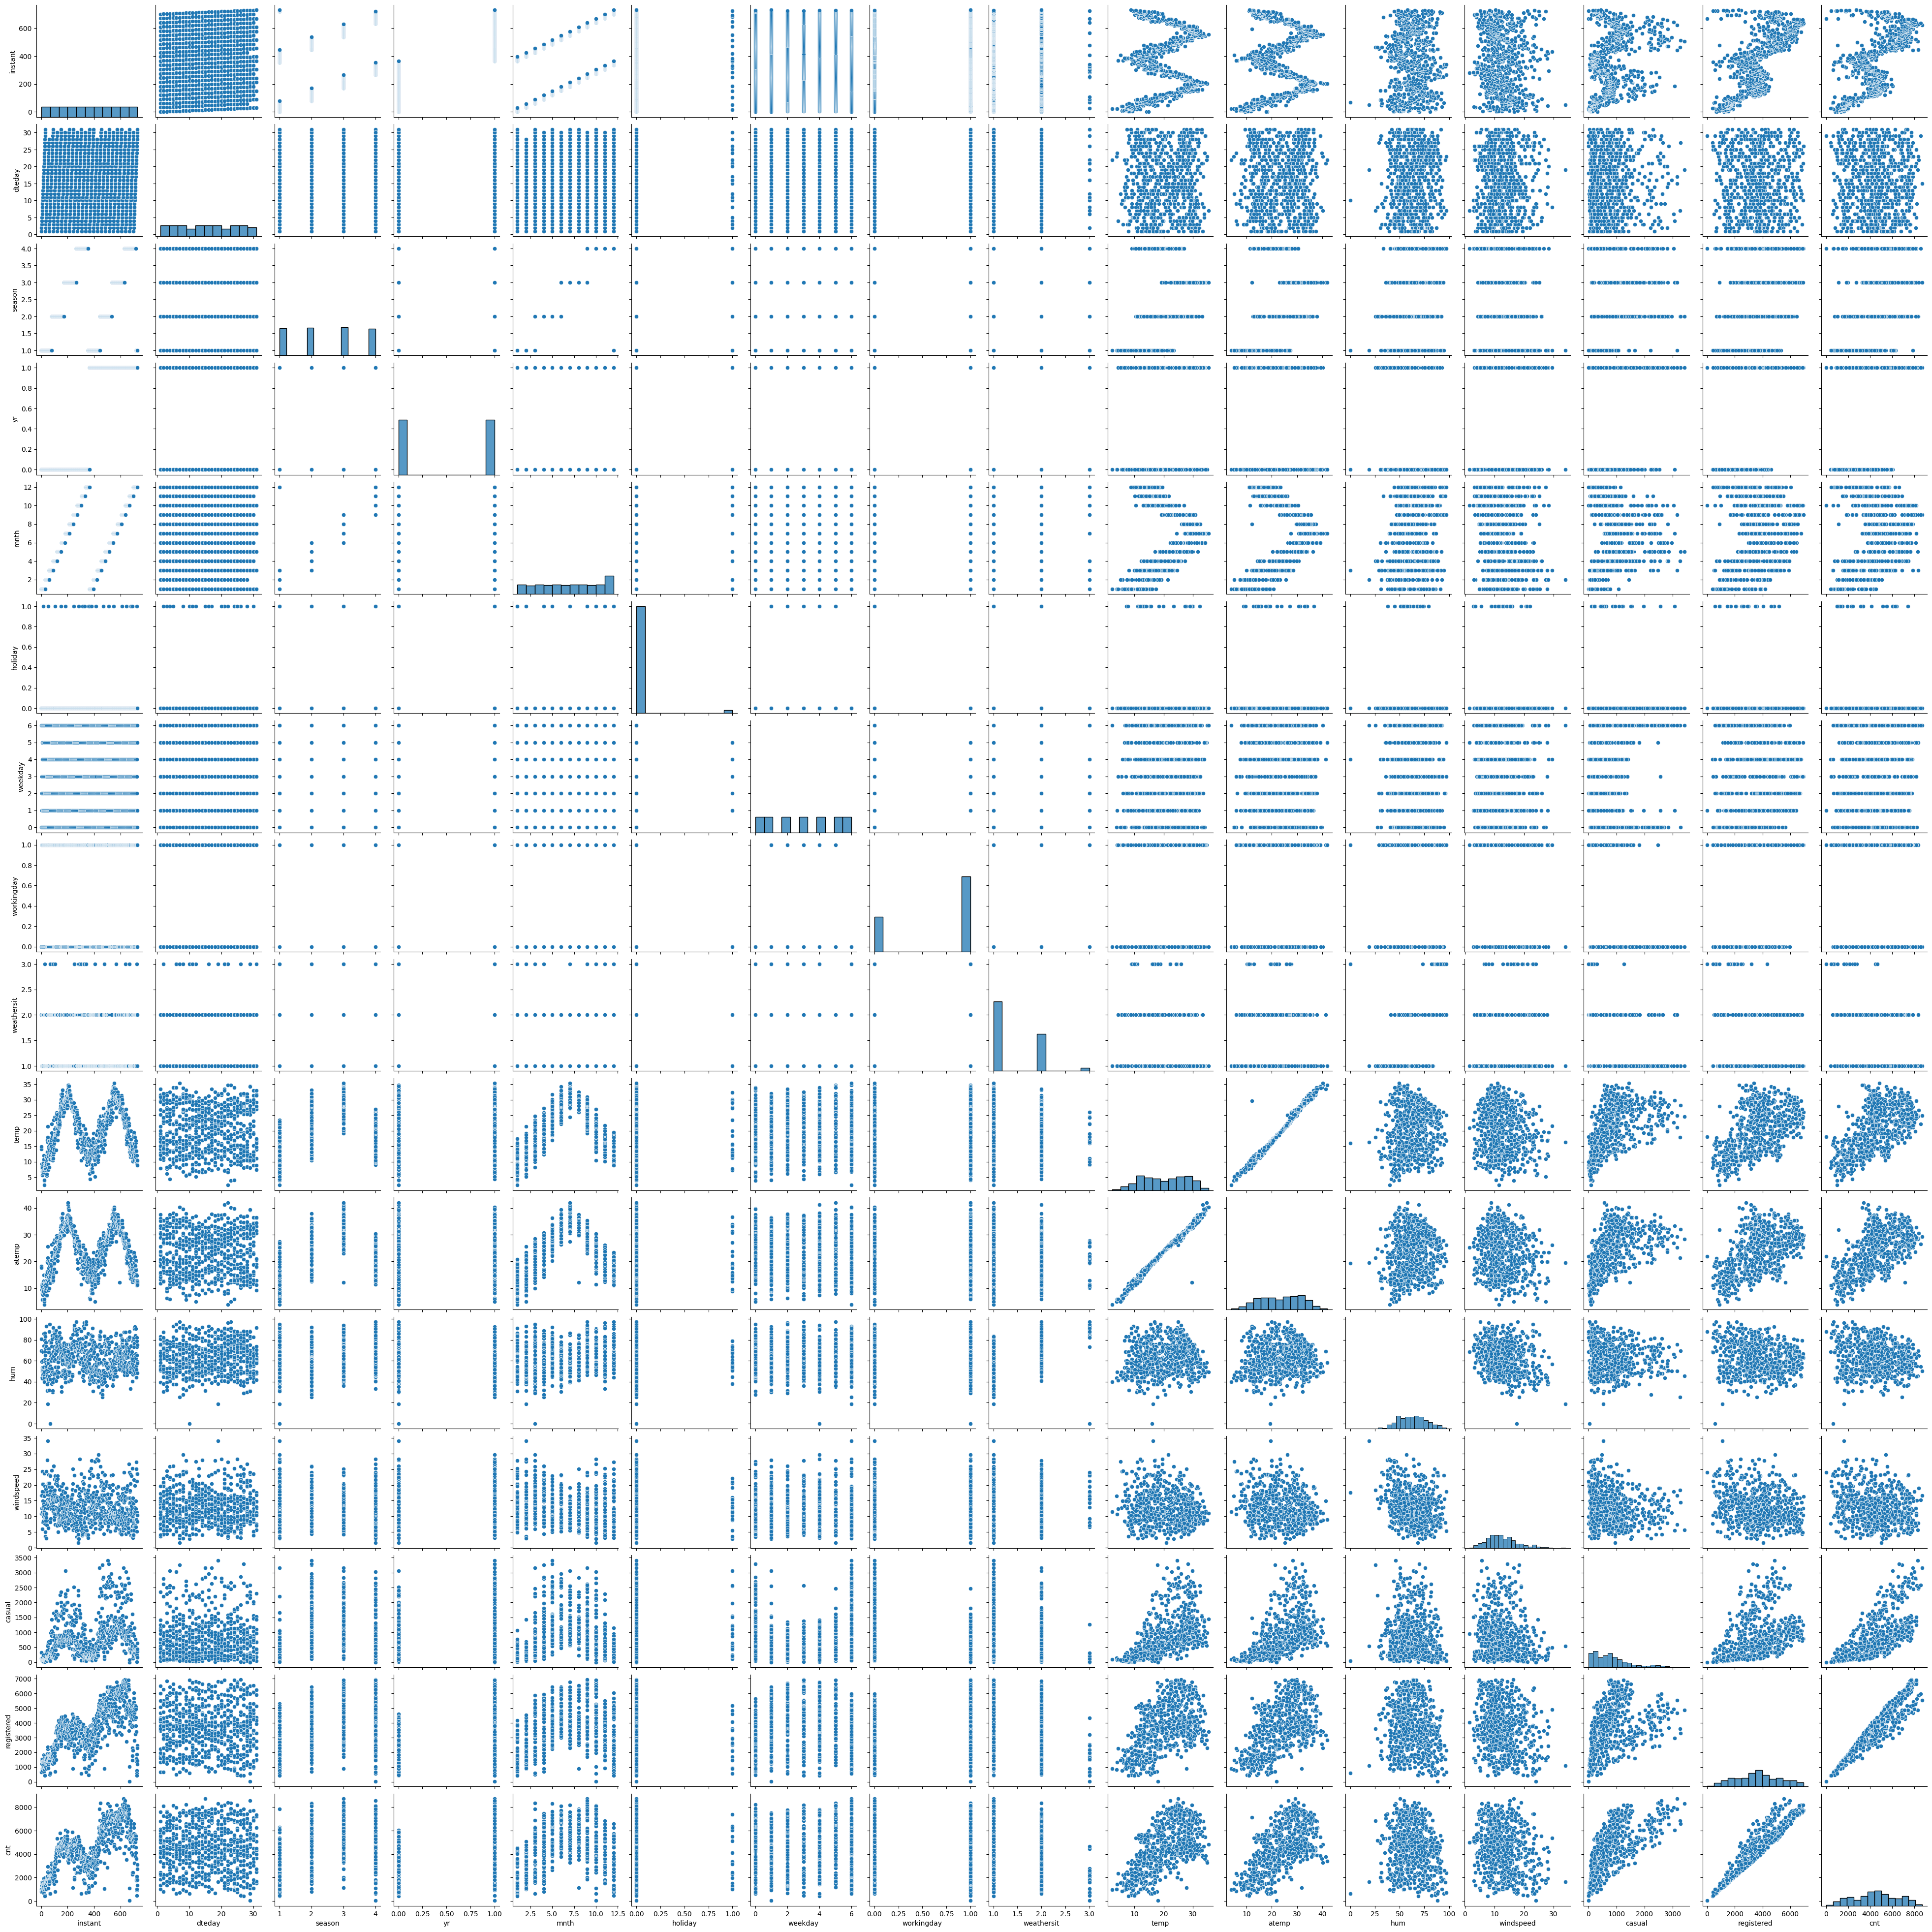

In [176]:
sns.pairplot(bike)
plt.show()

Dropping variable
- casual and registered As per data dictionary variable 'cnt' which is our target variable is derived from the above two variables. So we can drop these two variables
- instant we can drop as it is a Id variable which recognise all row uniquely
dteday All the infformation of dteday are already derived and present in data for ex: mnth, yr etc


In [177]:
# remove the columns which are not required
# instant - index column
# casual - casual users
# registered - registered users
bike = bike.drop(['instant', 'casual', 'registered'], axis=1)
bike.head()


dteday  season  yr  mnth  holiday  weekday  workingday  weathersit  \
0       1       1   0     1        0        6           0           2   
1       2       1   0     1        0        0           0           2   
2       3       1   0     1        0        1           1           1   
3       4       1   0     1        0        2           1           1   
4       5       1   0     1        0        3           1           1   

        temp     atemp      hum  windspeed   cnt  
0  14.110847  18.18125  80.5833  10.749882   985  
1  14.902598  17.68695  69.6087  16.652113   801  
2   8.050924   9.47025  43.7273  16.636703  1349  
3   8.200000  10.60610  59.0435  10.739832  1562  
4   9.305237  11.46350  43.6957  12.522300  1600

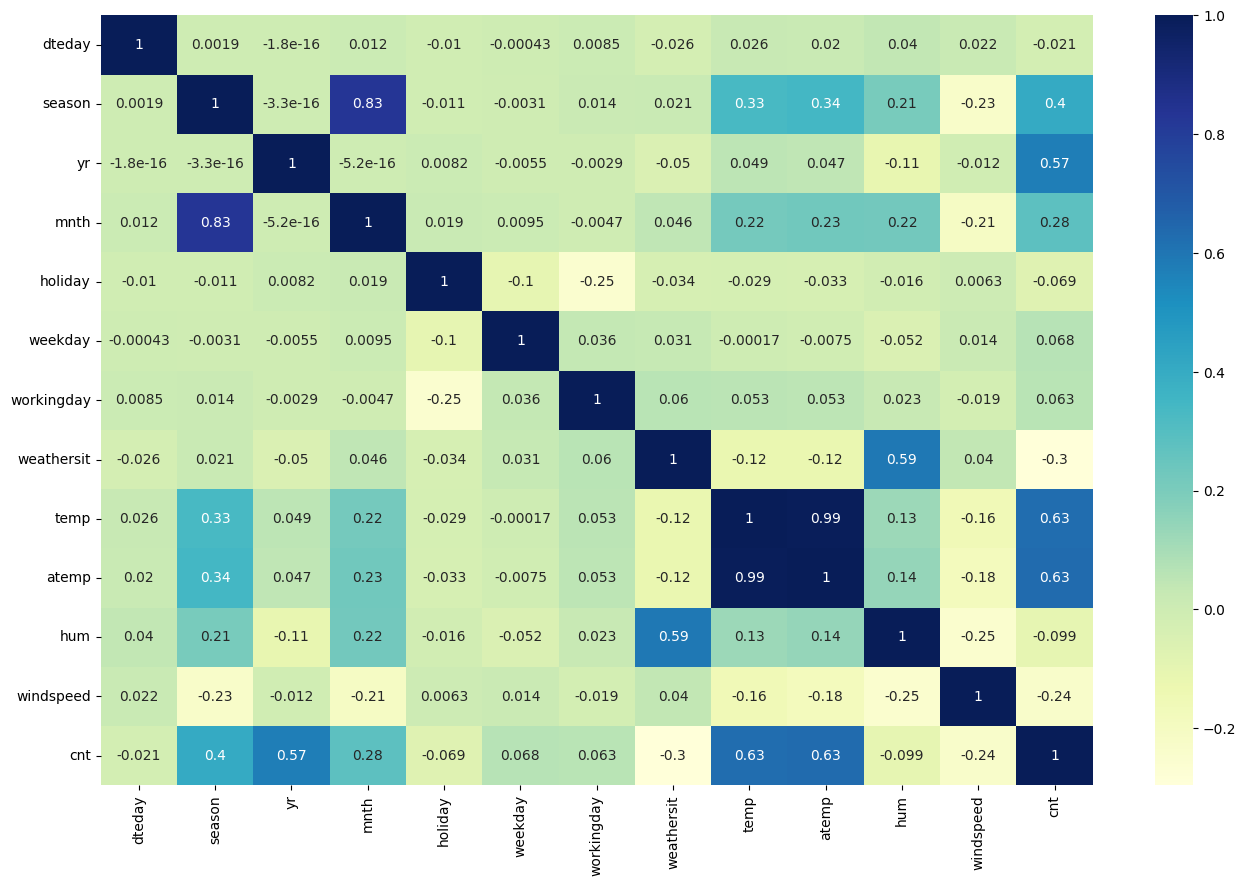

In [178]:
# Check the correlation of the dataset
plt.figure(figsize = (16, 10))
sns.heatmap(bike.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [179]:
# Mapping variables with appropriate values in variables season, mnth, weathersit, weekday

bike['season']=bike.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
bike['mnth']=bike.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike['weathersit']=bike.weathersit.map({1: 'Clear',2:'Mist_Cloudy',3:'Light_Snow',4:'Snow_Fog'})
bike['weekday']=bike.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

In [180]:
bike.head()

dteday  season  yr mnth  holiday weekday  workingday   weathersit  \
0       1  spring   0  Jan        0     Sat           0  Mist_Cloudy   
1       2  spring   0  Jan        0     Sun           0  Mist_Cloudy   
2       3  spring   0  Jan        0     Mon           1        Clear   
3       4  spring   0  Jan        0     Tue           1        Clear   
4       5  spring   0  Jan        0     Wed           1        Clear   

        temp     atemp      hum  windspeed   cnt  
0  14.110847  18.18125  80.5833  10.749882   985  
1  14.902598  17.68695  69.6087  16.652113   801  
2   8.050924   9.47025  43.7273  16.636703  1349  
3   8.200000  10.60610  59.0435  10.739832  1562  
4   9.305237  11.46350  43.6957  12.522300  1600

### Comparing the distribution of the target variable with the independent variables

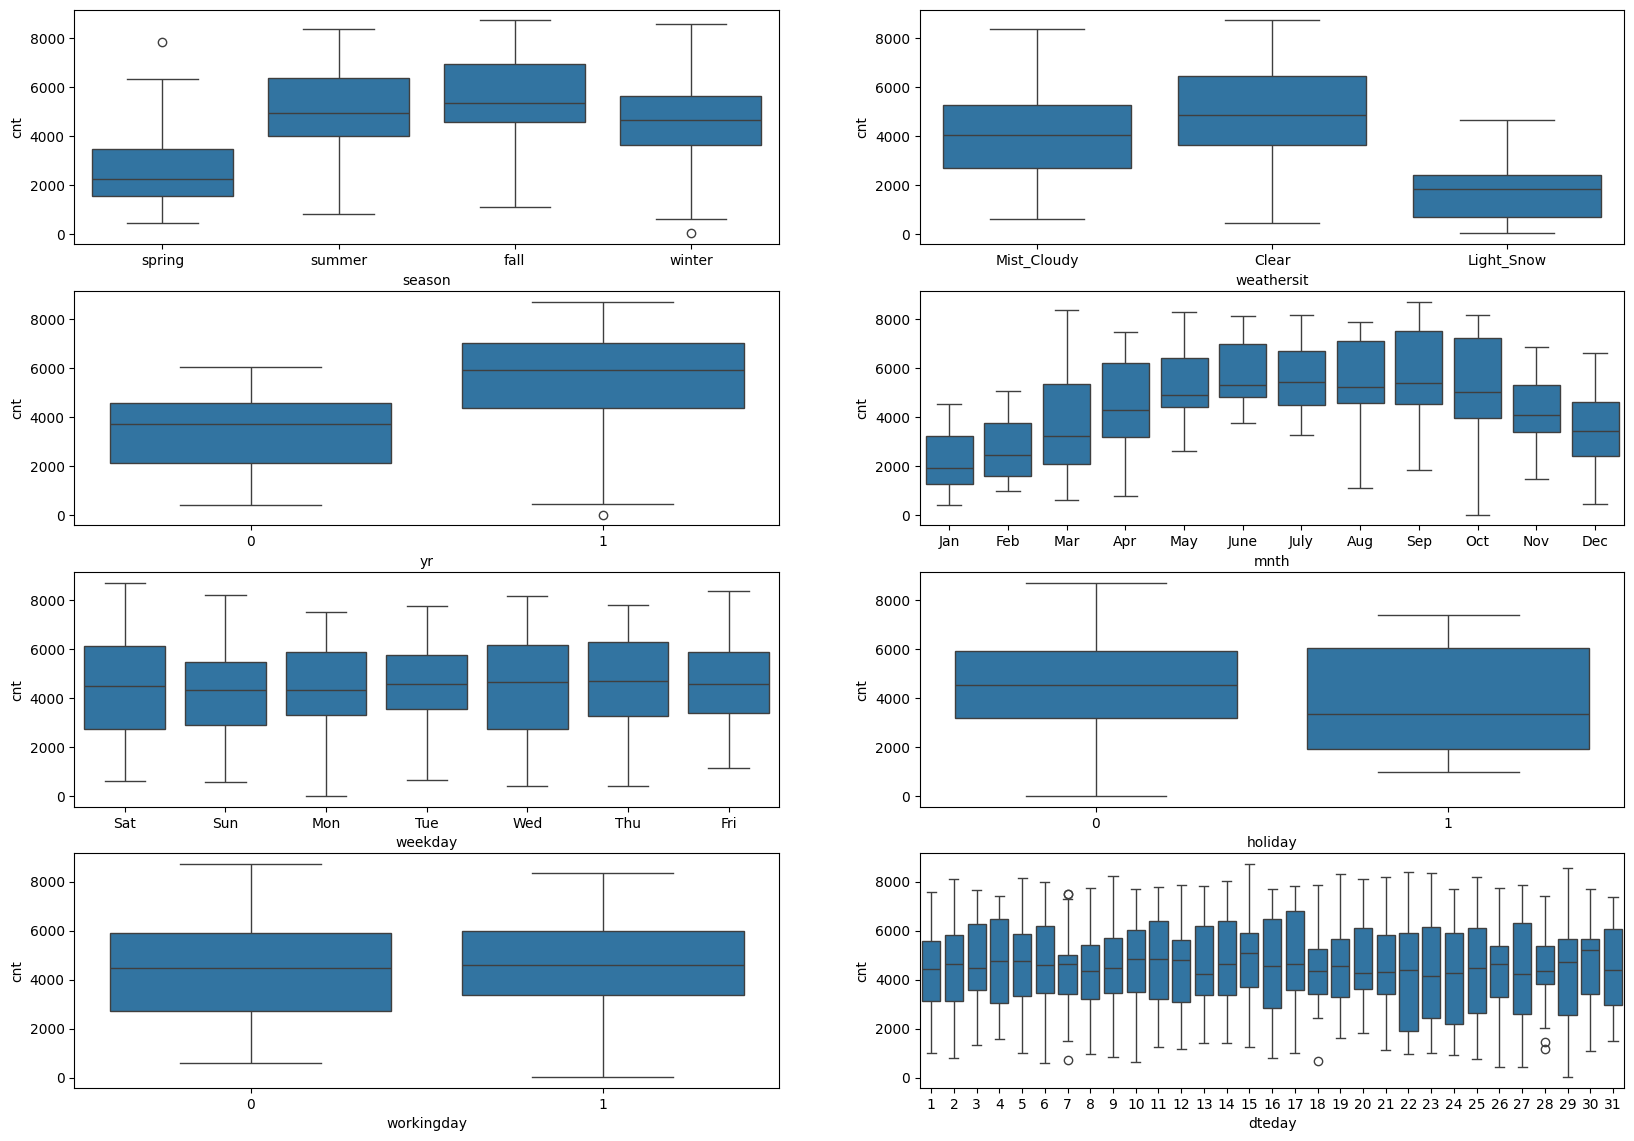

In [181]:
plt.figure(figsize=(20, 14))
plt.subplot(4,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(4,2,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(4,2,3)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(4,2,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(4,2,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(4,2,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(4,2,7)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(4,2,8)
sns.boxplot(x = 'dteday', y = 'cnt', data = bike)
plt.show()

### Analyzing the relationship between the target variable and the independent variables
- Season vs cnt - The demand for bikes is highest in Fall and lowest in Spring
- mnth vs cnt - The demand for bikes is highest in September and lowest in January
- yr vs cnt - The demand for bikes is higher in 2019 compared to 2018
- holiday vs cnt - The demand for bikes is higher on non-holidays compared to holidays
- weekday vs cnt - The demand for bikes is almost same on all days of the week
- workingday vs cnt - The demand for bikes is higher on working days compared to non-working days but we can drop this variable as it is highly correlated with weekday
- weathersit vs cnt - The demand for bikes is highest when the weather is clear, followed by partly cloudy, light rain and snow
- dteday vs cnt - not much information can be derived from this variable as it is a date variable which is already captured in other variables like yr, mnth, weekday etc so we can drop this variable


In [182]:
# drop the columns which are not required
bike = bike.drop(['dteday', 'workingday'], axis=1)

In [183]:
bike.head()

season  yr mnth  holiday weekday   weathersit       temp     atemp  \
0  spring   0  Jan        0     Sat  Mist_Cloudy  14.110847  18.18125   
1  spring   0  Jan        0     Sun  Mist_Cloudy  14.902598  17.68695   
2  spring   0  Jan        0     Mon        Clear   8.050924   9.47025   
3  spring   0  Jan        0     Tue        Clear   8.200000  10.60610   
4  spring   0  Jan        0     Wed        Clear   9.305237  11.46350   

       hum  windspeed   cnt  
0  80.5833  10.749882   985  
1  69.6087  16.652113   801  
2  43.7273  16.636703  1349  
3  59.0435  10.739832  1562  
4  43.6957  12.522300  1600

## Dummy Variables 
- We need to convert the categorical variables into dummy variables
- We will drop the first column from the set of dummy variables to avoid multicollinearity
- We will drop the original categorical variables after creating the dummy variables
- The reference category can be easily deduced where 0 is present in all the columns of a single row for all the other dummy variables of a particular category.
- For example, if we have 3 categories in a variable, then we will have 2 dummy variables. If both the dummy variables are 0, then it means the category of the reference variable is 3.

In [184]:
# Create dummy variables for the categorical variables
seson_ctg = pd.get_dummies(bike['season'], drop_first = True)
mnth_ctg = pd.get_dummies(bike['mnth'], drop_first = True)
weathersit_ctg = pd.get_dummies(bike['weathersit'], drop_first = True)
weekday_ctg = pd.get_dummies(bike['weekday'], drop_first = True)


In [185]:
# Add the results to the original bike dataframe
bike = pd.concat([bike, seson_ctg, mnth_ctg, weathersit_ctg, weekday_ctg], axis = 1)
bike.head()

season  yr mnth  holiday weekday   weathersit       temp     atemp  \
0  spring   0  Jan        0     Sat  Mist_Cloudy  14.110847  18.18125   
1  spring   0  Jan        0     Sun  Mist_Cloudy  14.902598  17.68695   
2  spring   0  Jan        0     Mon        Clear   8.050924   9.47025   
3  spring   0  Jan        0     Tue        Clear   8.200000  10.60610   
4  spring   0  Jan        0     Wed        Clear   9.305237  11.46350   

       hum  windspeed  ...    Oct    Sep  Light_Snow  Mist_Cloudy    Mon  \
0  80.5833  10.749882  ...  False  False       False         True  False   
1  69.6087  16.652113  ...  False  False       False         True  False   
2  43.7273  16.636703  ...  False  False       False        False   True   
3  59.0435  10.739832  ...  False  False       False        False  False   
4  43.6957  12.522300  ...  False  False       False        False  False   

     Sat    Sun    Thu    Tue    Wed  
0   True  False  False  False  False  
1  False   True  False  False  False  
2  False  False  False  False  False  
3  False  False  False   True  False  
4  False  False  False  False   True  

[5 rows x 33 columns]

In [186]:
bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit', 'temp',
       'atemp', 'hum', 'windspeed', 'cnt', 'spring', 'summer', 'winter', 'Aug',
       'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep',
       'Light_Snow', 'Mist_Cloudy', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

In [187]:
bike.drop(['season', 'mnth', 'weathersit', 'weekday'], axis=1, inplace=True)


In [188]:
bike.head()

yr  holiday       temp     atemp      hum  windspeed   cnt  spring  summer  \
0   0        0  14.110847  18.18125  80.5833  10.749882   985    True   False   
1   0        0  14.902598  17.68695  69.6087  16.652113   801    True   False   
2   0        0   8.050924   9.47025  43.7273  16.636703  1349    True   False   
3   0        0   8.200000  10.60610  59.0435  10.739832  1562    True   False   
4   0        0   9.305237  11.46350  43.6957  12.522300  1600    True   False   

   winter  ...    Oct    Sep  Light_Snow  Mist_Cloudy    Mon    Sat    Sun  \
0   False  ...  False  False       False         True  False   True  False   
1   False  ...  False  False       False         True  False  False   True   
2   False  ...  False  False       False        False   True  False  False   
3   False  ...  False  False       False        False  False  False  False   
4   False  ...  False  False       False        False  False  False  False   

     Thu    Tue    Wed  
0  False  False  False  
1  False  False  False  
2  False  False  False  
3  False   True  False  
4  False  False   True  

[5 rows x 29 columns]

In [189]:
# map the value of spring to 1 where true and 0 where false
bike['spring'] = bike['spring'].map({True:1, False:0}).astype(int)
bike['summer'] = bike['summer'].map({True:1, False:0}).astype(int)
bike['winter'] = bike['winter'].map({True:1, False:0}).astype(int)
bike['Aug'] = bike['Aug'].map({True:1, False:0}).astype(int)
bike['Dec'] = bike['Dec'].map({True:1, False:0}).astype(int)
bike['Feb'] = bike['Feb'].map({True:1, False:0}).astype(int)
bike['Jan'] = bike['Jan'].map({True:1, False:0}).astype(int)
bike['July'] = bike['July'].map({True:1, False:0}).astype(int)
bike['June'] = bike['June'].map({True:1, False:0}).astype(int)
bike['Mar'] = bike['Mar'].map({True:1, False:0}).astype(int)
bike['May'] = bike['May'].map({True:1, False:0}).astype(int)
bike['Nov'] = bike['Nov'].map({True:1, False:0}).astype(int)    
bike['Oct'] = bike['Oct'].map({True:1, False:0}).astype(int)
bike['Sep'] = bike['Sep'].map({True:1, False:0}).astype(int)
bike['Light_Snow'] = bike['Light_Snow'].map({True:1, False:0}).astype(int)
bike['Mist_Cloudy'] = bike['Mist_Cloudy'].map({True:1, False:0}).astype(int)
bike['Mon'] = bike['Mon'].map({True:1, False:0}).astype(int)
bike['Tue'] = bike['Tue'].map({True:1, False:0}).astype(int)
bike['Wed'] = bike['Wed'].map({True:1, False:0}).astype(int)
bike['Thu'] = bike['Thu'].map({True:1, False:0}).astype(int)
bike['Sat'] = bike['Sat'].map({True:1, False:0}).astype(int)
bike['Sun'] = bike['Sun'].map({True:1, False:0}).astype(int)


In [190]:
bike.head()

yr  holiday       temp     atemp      hum  windspeed   cnt  spring  summer  \
0   0        0  14.110847  18.18125  80.5833  10.749882   985       1       0   
1   0        0  14.902598  17.68695  69.6087  16.652113   801       1       0   
2   0        0   8.050924   9.47025  43.7273  16.636703  1349       1       0   
3   0        0   8.200000  10.60610  59.0435  10.739832  1562       1       0   
4   0        0   9.305237  11.46350  43.6957  12.522300  1600       1       0   

   winter  ...  Oct  Sep  Light_Snow  Mist_Cloudy  Mon  Sat  Sun  Thu  Tue  \
0       0  ...    0    0           0            1    0    1    0    0    0   
1       0  ...    0    0           0            1    0    0    1    0    0   
2       0  ...    0    0           0            0    1    0    0    0    0   
3       0  ...    0    0           0            0    0    0    0    0    1   
4       0  ...    0    0           0            0    0    0    0    0    0   

   Wed  
0    0  
1    0  
2    0  
3    0  
4    1  

[5 rows x 29 columns]

In [191]:
bike.shape

(730, 29)

## Step 3: Data training and testing

In [192]:
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)
df_train.head()

yr  holiday       temp    atemp      hum  windspeed   cnt  spring  \
653   1        0  19.201653  23.0423  55.8333  12.208807  7534       0   
576   1        0  29.246653  33.1448  70.4167  11.083475  7216       0   
426   1        0  16.980847  20.6746  62.1250  10.792293  4066       1   
728   1        0  10.489153  11.5850  48.3333  23.500518  1796       1   
482   1        0  15.443347  18.8752  48.9583   8.708325  4220       0   

     summer  winter  ...  Oct  Sep  Light_Snow  Mist_Cloudy  Mon  Sat  Sun  \
653       0       1  ...    1    0           0            0    0    0    0   
576       0       0  ...    0    0           0            0    0    0    0   
426       0       0  ...    0    0           0            1    0    1    0   
728       0       0  ...    0    0           0            0    0    0    1   
482       1       0  ...    0    0           0            1    0    1    0   

     Thu  Tue  Wed  
653    0    1    0  
576    0    1    0  
426    0    0    0  
728    0    0    0  
482    0    0    0  

[5 rows x 29 columns]

In [193]:
df_train.columns

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'spring',
       'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar',
       'May', 'Nov', 'Oct', 'Sep', 'Light_Snow', 'Mist_Cloudy', 'Mon', 'Sat',
       'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

- We will split the data into a training set and a testing set
Apply standardization() to all the columns except the 'yes-no' and 'dummy' variables
Inorder to solve the problem of interpretation, paricularly the coffecient or estimates should be comparable


In [194]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
scaler = StandardScaler()
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

yr  holiday      temp     atemp       hum  windspeed       cnt  spring  \
653   1        0 -0.121335 -0.055878 -0.514725  -0.117752  1.562685       0   
576   1        0  1.231731  1.194106  0.516433  -0.330615  1.399629       0   
426   1        0 -0.420478 -0.348834 -0.069854  -0.385694 -0.215554       1   
728   1        0 -1.294913 -1.473492 -1.045032   2.018143 -1.379511       1   
482   1        0 -0.627580 -0.571474 -1.000840  -0.779889 -0.136589       0   

     summer  winter  ...  Oct  Sep  Light_Snow  Mist_Cloudy  Mon  Sat  Sun  \
653       0       1  ...    1    0           0            0    0    0    0   
576       0       0  ...    0    0           0            0    0    0    0   
426       0       0  ...    0    0           0            1    0    1    0   
728       0       0  ...    0    0           0            0    0    0    1   
482       1       0  ...    0    0           0            1    0    1    0   

     Thu  Tue  Wed  
653    0    1    0  
576    0    1    0  
426    0    0    0  
728    0    0    0  
482    0    0    0  

[5 rows x 29 columns]

## correlation matrix
- We will check the correlation matrix to see if there is any multicollinearity between the independent variables

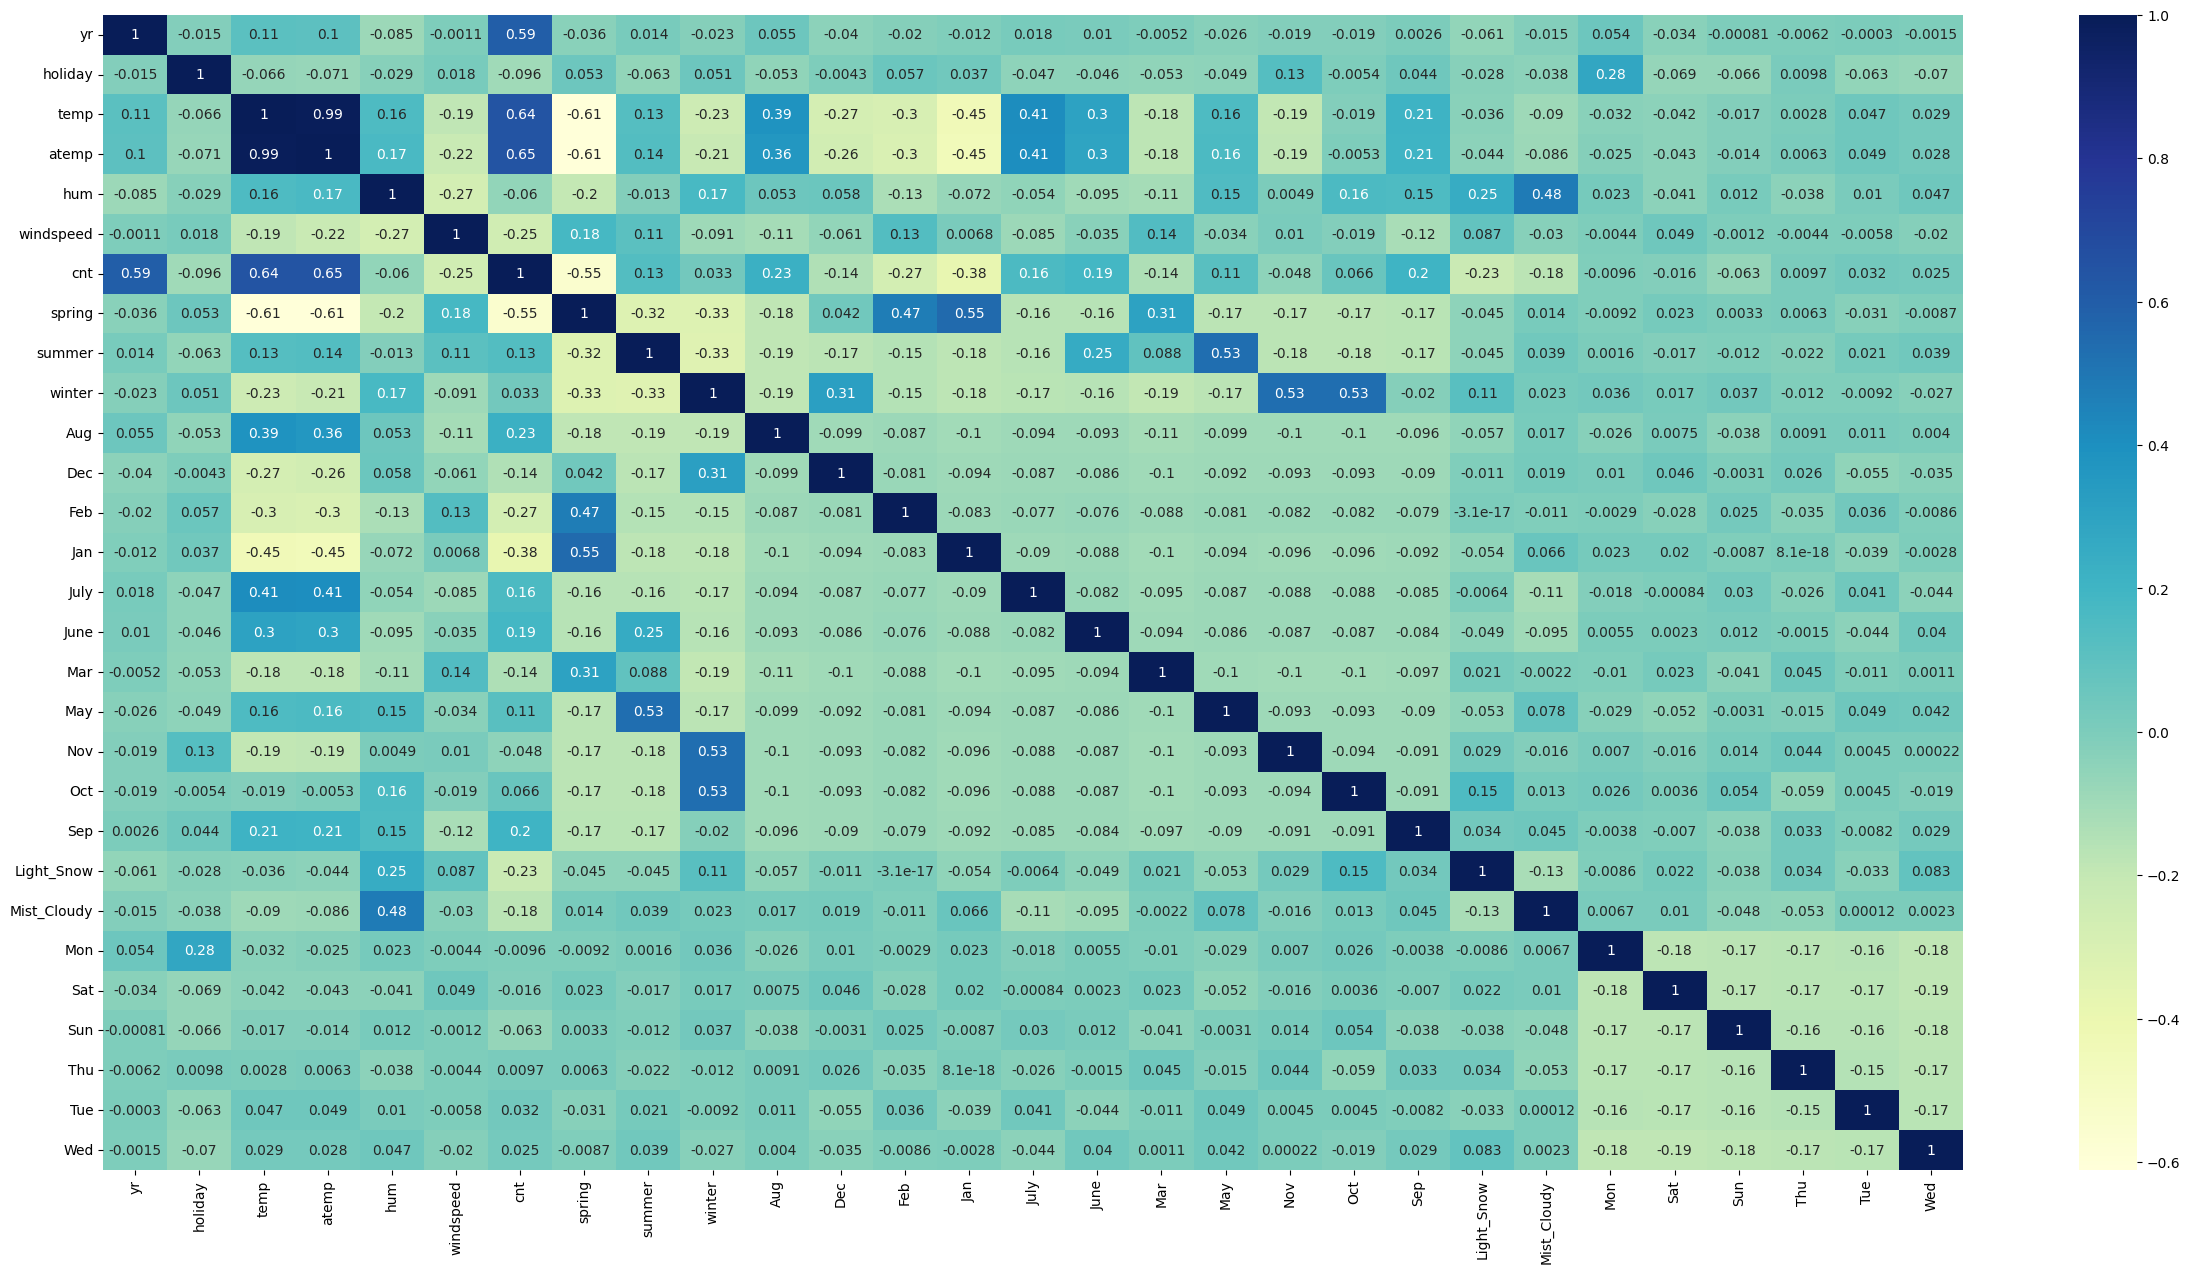

In [195]:
plt.figure(figsize = (30, 15))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Step 4: Building the model
- Use X_train and y_train to build the model
- RFE to eliminate the variables which are not significant
- We will use statsmodels to build the model as it provides detailed summary of the model
- We will use the OLS method to build the model
- We will check the VIF values to see if there is any multicollinearity between the independent variables


   




In [196]:
y_train = df_train.pop('cnt')
X_train = df_train


In [197]:
# import the LinearRegression function from sklearn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)           # running RFE
rfe = rfe.fit(X_train, y_train)
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'spring', 'summer', 'winter', 'Dec', 'Feb',
       'Jan', 'July', 'Nov', 'Sep', 'Light_Snow', 'Mist_Cloudy', 'Sun'],
      dtype='object')

In [198]:
# Creating X_train_rfe dataframe with RFE selected variables
X_train = X_train[col]
# Adding a constant variable
# since statsmodels.OLS does not have intercept by default
# we need to add manually
import numpy as np
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     165.0
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          2.58e-181
Time:                        13:58:38   Log-Likelihood:                -266.29
No. Observations:                 510   AIC:                             564.6
Df Residuals:                     494   BIC:                             632.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.3116      0.069     -4.487      

- as we can see tha P value is high for Feb that means it is not significant so we can drop this variable

In [199]:
# drop Feb column as it has high p value
X_train_lm = X_train_lm.drop(['Feb'], axis=1)
X_train_lm = sm.add_constant(X_train_lm)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     176.3
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          5.17e-182
Time:                        13:58:38   Log-Likelihood:                -267.33
No. Observations:                 510   AIC:                             564.7
Df Residuals:                     495   BIC:                             628.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.3267      0.069     -4.757      

In [200]:
# lets drop summer column as it has high p value
X_train_lm = X_train_lm.drop(['summer'], axis=1)
X_train_lm = sm.add_constant(X_train_lm)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     189.0
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          1.37e-182
Time:                        13:58:39   Log-Likelihood:                -268.69
No. Observations:                 510   AIC:                             565.4
Df Residuals:                     496   BIC:                             624.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.2394      0.043     -5.573      

### check VIF

In [201]:
# calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vi = vif.sort_values(by = "VIF", ascending = False)
vi

Features   VIF
3        spring  3.78
2          temp  2.81
5        winter  2.70
8           Jan  2.39
0            yr  1.96
7           Feb  1.94
10          Nov  1.86
6           Dec  1.64
13  Mist_Cloudy  1.52
9          July  1.41
4        summer  1.40
11          Sep  1.20
14          Sun  1.17
1       holiday  1.07
12   Light_Snow  1.07

## Step 5: Residual Analysis
- We will check the residuals to see if error terms are normally distributed
- We plot the histogram of the error terms and see if it is normally distributed

Text(0.5, 0, 'Residual')

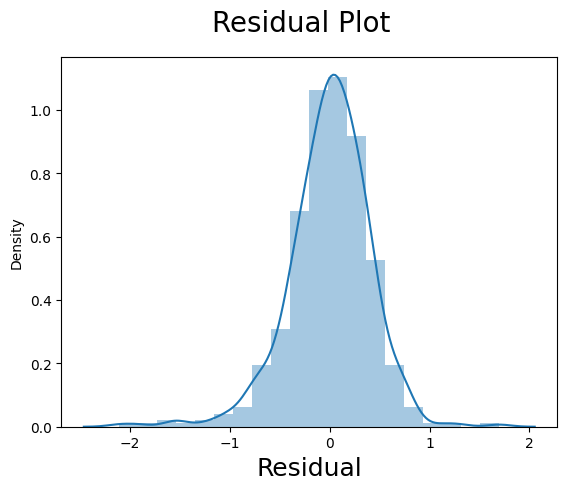

In [202]:
y_train_cnt = lm.predict(X_train_lm)
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Residual Plot', fontsize = 20)                  # Plot heading 
plt.xlabel('Residual', fontsize = 18) 

- As we can see that the error terms are normally distributed
lets apply the model on test data

In [203]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])
y_test = df_test.pop('cnt')
X_test = df_test
# Now let's use our model to make predictions.



In [213]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train.columns]
X_test_new.drop(['Feb', 'summer'], axis = 1, inplace = True)
X_test_new.columns


Index(['yr', 'holiday', 'temp', 'spring', 'winter', 'Dec', 'Jan', 'July',
       'Nov', 'Sep', 'Light_Snow', 'Mist_Cloudy', 'Sun'],
      dtype='object')

In [214]:
# Adding a constant variable
X_test_new = sm.add_constant(X_test_new)

In [215]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

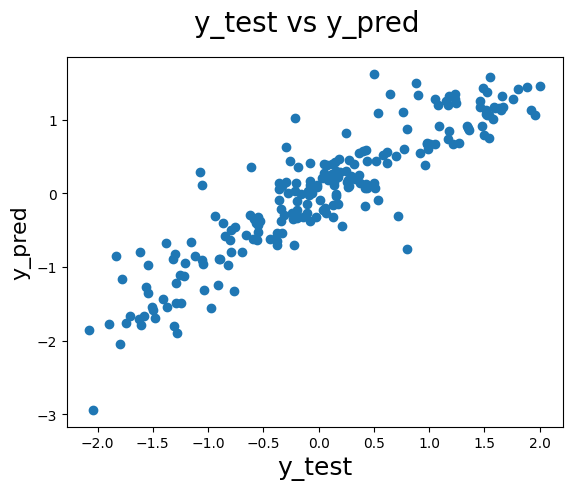

In [217]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   

In [218]:
df_test.describe()

yr     holiday        temp       atemp         hum   windspeed  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.479452    0.036530    0.096083    0.094272   -0.081388   -0.043731   
std      0.500722    0.188034    1.035793    1.026916    1.022197    0.942916   
min      0.000000    0.000000   -2.174744   -2.295437   -2.665411   -2.143341   
25%      0.000000    0.000000   -0.809372   -0.792914   -0.844689   -0.720691   
50%      0.000000    0.000000    0.094973    0.170654   -0.155290   -0.125622   
75%      1.000000    0.000000    0.983209    0.947998    0.641963    0.485055   
max      1.000000    1.000000    1.981904    2.205446    2.413751    2.869216   

           spring      summer      winter         Aug  ...         Oct  \
count  219.000000  219.000000  219.000000  219.000000  ...  219.000000   
mean     0.255708    0.264840    0.232877    0.059361  ...    0.082192   
std      0.437258    0.442259    0.423633    0.236840  ...    0.275286   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
50%      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
75%      1.000000    1.000000    0.000000    0.000000  ...    0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

              Sep  Light_Snow  Mist_Cloudy         Mon         Sat  \
count  219.000000  219.000000   219.000000  219.000000  219.000000   
mean     0.086758    0.027397     0.319635    0.127854    0.118721   
std      0.282125    0.163612     0.467403    0.334692    0.324202   
min      0.000000    0.000000     0.000000    0.000000    0.000000   
25%      0.000000    0.000000     0.000000    0.000000    0.000000   
50%      0.000000    0.000000     0.000000    0.000000    0.000000   
75%      0.000000    0.000000     1.000000    0.000000    0.000000   
max      1.000000    1.000000     1.000000    1.000000    1.000000   

              Sun         Thu         Tue         Wed  
count  219.000000  219.000000  219.000000  219.000000  
mean     0.146119    0.164384    0.164384    0.100457  
std      0.354034    0.371472    0.371472    0.301297  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000    1.000000  

[8 rows x 28 columns]

In [219]:
# Caculate R^2 on test data
r2_score(y_test, y_pred)

0.8230505251639096